# Interactive visualization of 1D gaussians

The fully general 1D gaussian is given by the expression:
$$ g(x;q,p,a,b) = e^{-\frac{1}{2}(a + ib)(x-q)^2 + ip(x-q)} $$
This notebook is an interactive exploration of the shape of $g$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *
from Hylleraas import HylleraasColors
%matplotlib notebook

plt.style.use('seaborn-talk')
plt.rcParams["font.family"] = "Helvetica Neue"

In [2]:
# Set up a plotting grid
x = np.linspace(-20,20,2000)

# Define gaussian function
def gaussian(x,q,p,a,b):
    Q = -0.5*(a + 1j*b)*(x-q)**2 + 1j*p*(x-q)
    return np.exp(Q)

<IPython.core.display.Javascript object>


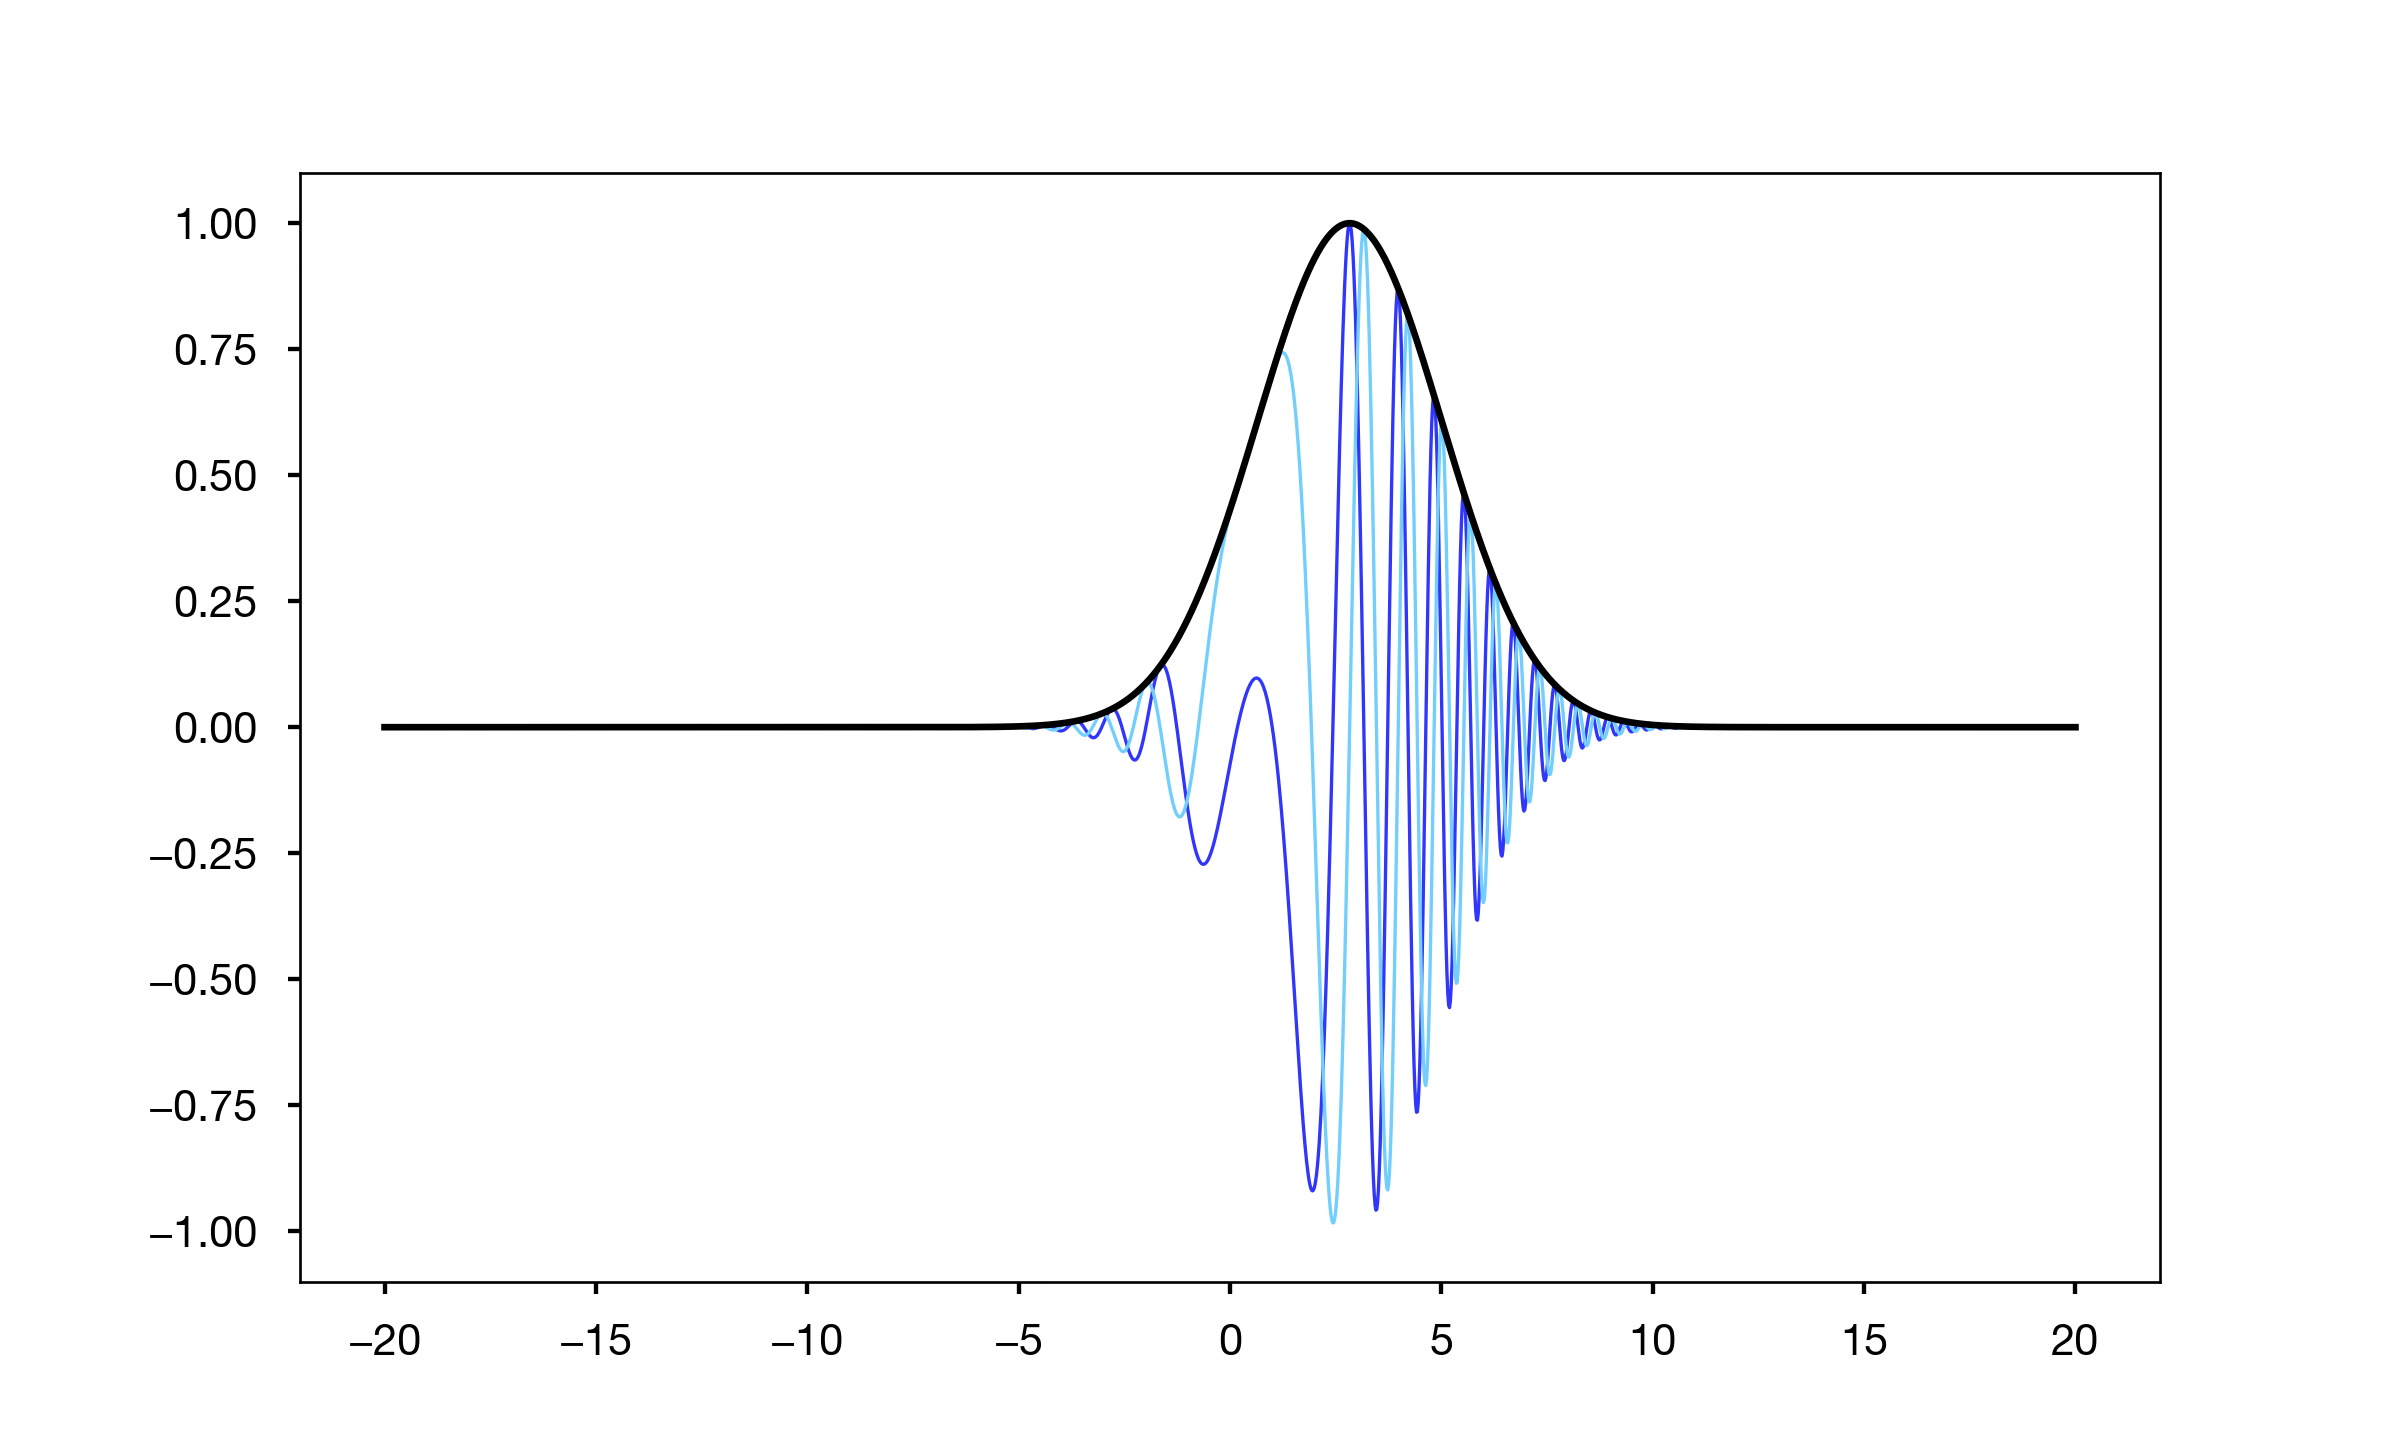

interactive(children=(FloatSlider(value=1.0, description='a', max=5.0, step=0.01), FloatSlider(value=0.0, desc…

In [4]:
# Set up the plot

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)
line1, = ax.plot(x, gaussian(x,0,0,1,0).real, color=HylleraasColors.blue, linewidth=1.0)
line2, = ax.plot(x, gaussian(x,0,0,1,0).imag, color=HylleraasColors.cyan, linewidth=1.0)
line3, = ax.plot(x, np.abs(gaussian(x,0,0,1,0)), color='black', linewidth=2.0)
ax.set_ylim(-1.1,1.1)

# Set up a plot update function for interactive adjustment
def update(a = 1.0, b = 0.0, q = 0.0, p = 0.0):
    y = gaussian(x,q,p,a,b)
    line1.set_ydata(y.real)
    line2.set_ydata(y.imag)
    line3.set_ydata(np.abs(y))
    fig.canvas.draw_idle()

# Start interacting
interact(update, a = (0.0, 5.0, 0.01), b = (-5,5,0.01), q = (-5, 5, 0.01), p = (-10, 10, 0.01));